In [29]:
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [307]:
df=pd.read_excel("preTx_analysis_v2.xlsx", sheet_name=1) #excel sheet 2

In [308]:
df.shape

(865, 47)

In [310]:
#df[(df['PlanningWait']<=20)&(df['PlanningWait']>=-5)]['PlanningWait'].median()

In [311]:
#df[(df['PlanningWait']<=20)&(df['PlanningWait']>=-5)]['PlanningWait']=2

In [374]:
df[(df['PlanDur']<=20)&(df['PlanDur']>=0)]['PlanDur'].mean()

0.8530092592592593

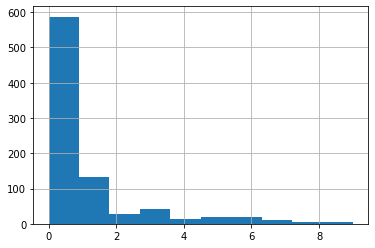

In [313]:
df['PlanDur'].hist()

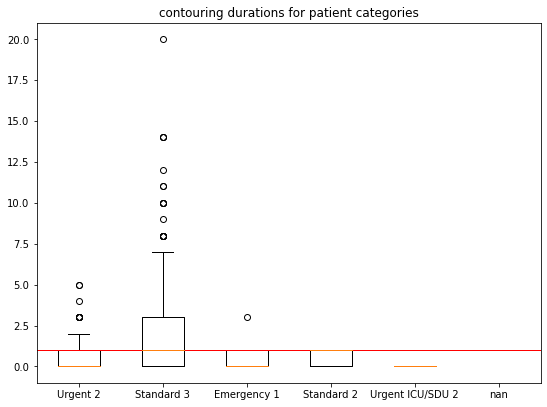

In [376]:
# box plots of pretreatment durations of all patients based on Category
data_list=[]
categories=df['Category'].unique()
for i in categories:
    data=df[df['Category']==i]['ContourDur']
    data_list.append(data)

fig = plt.figure(figsize =(7,5)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(data_list,labels=categories,) 
plt.axhline(y=df['ContourDur'].median(), color='r', linestyle='-',lw=1)  
ax.set_title('contouring durations for patient categories')
# show plot 
plt.show()

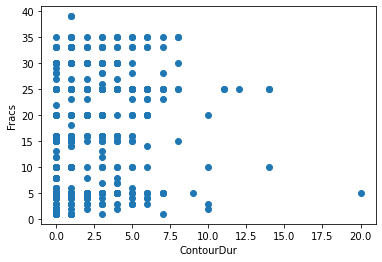

In [380]:
import matplotlib.pyplot as plt

y = df['Fracs']
x = df['ContourDur']

plt.scatter(x, y)
plt.xlabel("ContourDur")
plt.ylabel("Fracs")
plt.show()

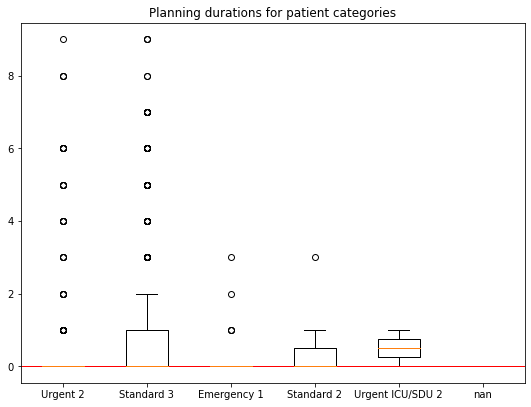

In [377]:
# box plots of pretreatment durations of all patients based on Category
data_list=[]
categories=df['Category'].unique()
for i in categories:
    data=df[df['Category']==i]['PlanDur']
    data_list.append(data)

fig = plt.figure(figsize =(7,5)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(data_list,labels=categories,) 
plt.axhline(y=df['PlanDur'].median(), color='r', linestyle='-',lw=1)  
ax.set_title('Planning durations for patient categories')
# show plot 
plt.show()

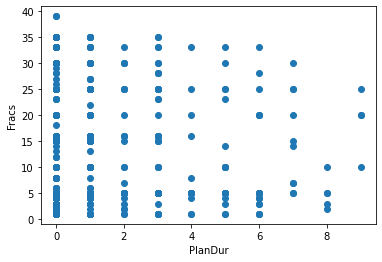

In [382]:
import matplotlib.pyplot as plt

y = df['Fracs']
x = df['PlanDur']

plt.scatter(x, y)
plt.xlabel("PlanDur")
plt.ylabel("Fracs")
plt.show()

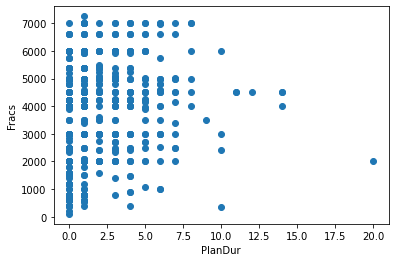

In [384]:
import matplotlib.pyplot as plt

y = df['DosePrescribed']
x = df['ContourDur']

plt.scatter(x, y)
plt.xlabel("PlanDur")
plt.ylabel("Fracs")
plt.show()

In [390]:
y = df['Fracs'].values
x = df['ContourDur'].values
np.corrcoef(x, y)

array([[nan, nan],
       [nan, nan]])

In [314]:
#df[df['PlanDur']>20]['PlanDur']=0
#df[df['PlanDur']<-5]['PlanDur']=0

In [315]:
df_clf=df[['SiteGroup','Fracs','DosePrescribed','ContourDur','PlanDur']]

In [316]:
df_clf.dropna(inplace=True)

<ipython-input-316-5f9d69886bd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clf.dropna(inplace=True)


In [317]:
df_clf['SiteGroup'].isnull().sum()#values.any()
#df.dropna(inplace=True)

0

In [295]:
# one hot encode sitegroup feature
df_dum = pd.get_dummies(df_clf, columns=['SiteGroup'])
df_dum.shape

(864, 18)

In [158]:
df_dum.loc[df_dum['ContourDur'] <=1, 'ContourGroup'] = 1
df_dum.loc[(df_dum['ContourDur'] <=4)&(df_dum['ContourDur']>=2), 'ContourGroup'] = 2
df_dum.loc[df_dum['ContourDur'] >=5, 'ContourGroup'] = 3

In [159]:
df_dum['ContourGroup'].value_counts()

1.0    599
2.0    178
3.0     87
Name: ContourGroup, dtype: int64

In [160]:
df_dum.columns

Index(['Fracs', 'DosePrescribed', 'ContourDur', 'PlanDur', 'SiteGroup_Breast',
       'SiteGroup_CNS', 'SiteGroup_Endocrine', 'SiteGroup_Eye',
       'SiteGroup_GI Lower', 'SiteGroup_GI Upper', 'SiteGroup_GU',
       'SiteGroup_Gynae', 'SiteGroup_Head & Neck', 'SiteGroup_Lung',
       'SiteGroup_Lymphoma', 'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma',
       'SiteGroup_Skin', 'ContourGroup'],
      dtype='object')

In [161]:
#df_dum['DosePerFrac']=df_dum['DosePrescribed']/df_dum['Fracs']

In [162]:
df_clf_1 = df_dum.drop(['PlanDur','ContourDur'],axis=1)
df_clf_1.shape

(864, 17)

In [241]:
df_clf_1.columns

Index(['Fracs', 'DosePrescribed', 'SiteGroup_Breast', 'SiteGroup_CNS',
       'SiteGroup_Endocrine', 'SiteGroup_Eye', 'SiteGroup_GI Lower',
       'SiteGroup_GI Upper', 'SiteGroup_GU', 'SiteGroup_Gynae',
       'SiteGroup_Head & Neck', 'SiteGroup_Lung', 'SiteGroup_Lymphoma',
       'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma', 'SiteGroup_Skin',
       'ContourGroup'],
      dtype='object')

In [163]:
X=df_clf_1.drop(["ContourGroup"], axis=1).values
y=df_clf_1['ContourGroup']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [164]:
## print info
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train mean:", y_train.shape, "| y_test mean:", y_test.shape)
print(df_train.shape[1], "features:", df_train.drop("ContourGroup",axis=1).columns.to_list())

X_train shape: (604, 16) | X_test shape: (260, 16)
y_train mean: (604,) | y_test mean: (260,)
17 features: ['Fracs', 'DosePrescribed', 'SiteGroup_Breast', 'SiteGroup_CNS', 'SiteGroup_Endocrine', 'SiteGroup_Eye', 'SiteGroup_GI Lower', 'SiteGroup_GI Upper', 'SiteGroup_GU', 'SiteGroup_Gynae', 'SiteGroup_Head & Neck', 'SiteGroup_Lung', 'SiteGroup_Lymphoma', 'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma', 'SiteGroup_Skin']


In [165]:
## split data - training and testing
#df_train, df_test = model_selection.train_test_split(df_clf_1, test_size=0.3, random_state=4)
## print info
print("X_train shape:", df_train.drop("ContourGroup",axis=1).shape, "| X_test shape:", df_test.drop("ContourGroup",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["ContourGroup"]),2), "| y_test mean:", round(np.mean(df_test["ContourGroup"]),2))
print(df_train.shape[1], "features:", df_train.drop("ContourGroup",axis=1).columns.to_list())

X_train shape: (604, 16) | X_test shape: (260, 16)
y_train mean: 1.39 | y_test mean: 1.45
17 features: ['Fracs', 'DosePrescribed', 'SiteGroup_Breast', 'SiteGroup_CNS', 'SiteGroup_Endocrine', 'SiteGroup_Eye', 'SiteGroup_GI Lower', 'SiteGroup_GI Upper', 'SiteGroup_GU', 'SiteGroup_Gynae', 'SiteGroup_Head & Neck', 'SiteGroup_Lung', 'SiteGroup_Lymphoma', 'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma', 'SiteGroup_Skin']


# Decision Tree model for contouring duration

In [166]:
# Grid search to select best parameters
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10),
              'max_features': np.arange(3,10),
              'min_samples_split': np.arange(2,10)}
GS = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid) #class_weight={1:1/360, 2:1/130, 3:1/130}),
GS.fit(X_train, y_train)
GS.best_params_

{'max_depth': 7, 'max_features': 7, 'min_samples_split': 2}

In [167]:
mdl_dt = DecisionTreeClassifier(max_depth=7,
                                max_features=7,
                                min_samples_split=2)
                                #class_weight={1:1/360, 2:1/130, 3:1/130})
mdl_dt = mdl_dt.fit(X_train, y_train)

In [168]:
fn = df_train.drop("ContourGroup", axis=1).columns
cn=['fast','medium','slow']

fig = plt.figure(figsize=(50,20), dpi=400)
_ = tree.plot_tree(mdl_dt, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)
#fig.savefig("decistion_tree.png")

In [169]:
mdl_dt.score(X_train,y_train)

0.7466887417218543

In [107]:
X_test

array([[   5., 2000.,    0., ...,    0.,    0.,    0.],
       [   5., 5000.,    0., ...,    0.,    0.,    0.],
       [   5., 2000.,    0., ...,    0.,    0.,    0.],
       ...,
       [  10., 2500.,    0., ...,    0.,    0.,    0.],
       [   5., 2000.,    0., ...,    0.,    0.,    0.],
       [   5., 2000.,    0., ...,    0.,    0.,    0.]])

In [108]:
y_train_pred=mdl_dt.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[388  26   9]
 [ 61  50   6]
 [ 18  25  21]]
              precision    recall  f1-score   support

         1.0       0.83      0.92      0.87       423
         2.0       0.50      0.43      0.46       117
         3.0       0.58      0.33      0.42        64

    accuracy                           0.76       604
   macro avg       0.64      0.56      0.58       604
weighted avg       0.74      0.76      0.74       604



In [109]:
# test set

#X_test = df_test.drop("ContourGroup", axis=1).values
#y_test = df_test["ContourGroup"].values
y_pred = mdl_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[164   9   3]
 [ 34  21   6]
 [  8  11   4]]
              precision    recall  f1-score   support

         1.0       0.80      0.93      0.86       176
         2.0       0.51      0.34      0.41        61
         3.0       0.31      0.17      0.22        23

    accuracy                           0.73       260
   macro avg       0.54      0.48      0.50       260
weighted avg       0.69      0.73      0.70       260



# Logistic regression (2 classes: fast vs. slow)

In [170]:
df_dum.loc[df_dum['ContourDur'] <=1, 'ContourGroup'] = 0
df_dum.loc[df_dum['ContourDur'] >1, 'ContourGroup'] = 1

In [171]:
df_dum['ContourGroup'].value_counts()

0.0    599
1.0    265
Name: ContourGroup, dtype: int64

In [172]:
df_lr_1 = df_dum.drop(['PlanDur','ContourDur'],axis=1)
df_lr_1.shape

(864, 17)

In [173]:
df_lr_1.columns

Index(['Fracs', 'DosePrescribed', 'SiteGroup_Breast', 'SiteGroup_CNS',
       'SiteGroup_Endocrine', 'SiteGroup_Eye', 'SiteGroup_GI Lower',
       'SiteGroup_GI Upper', 'SiteGroup_GU', 'SiteGroup_Gynae',
       'SiteGroup_Head & Neck', 'SiteGroup_Lung', 'SiteGroup_Lymphoma',
       'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma', 'SiteGroup_Skin',
       'ContourGroup'],
      dtype='object')

In [179]:
## split data - training and testing
X=df_lr_1.drop("ContourGroup", axis=1).values
y=df_lr_1['ContourGroup']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
## print info
print("X_train shape:", df_train.drop("ContourGroup",axis=1).shape, "| X_test shape:", df_test.drop("ContourGroup",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["ContourGroup"]),2), "| y_test mean:", round(np.mean(df_test["ContourGroup"]),2))
print(df_train.shape[1], "features:", df_train.drop("ContourGroup",axis=1).columns.to_list())

X_train shape: (604, 16) | X_test shape: (260, 16)
y_train mean: 1.39 | y_test mean: 1.45
17 features: ['Fracs', 'DosePrescribed', 'SiteGroup_Breast', 'SiteGroup_CNS', 'SiteGroup_Endocrine', 'SiteGroup_Eye', 'SiteGroup_GI Lower', 'SiteGroup_GI Upper', 'SiteGroup_GU', 'SiteGroup_Gynae', 'SiteGroup_Head & Neck', 'SiteGroup_Lung', 'SiteGroup_Lymphoma', 'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma', 'SiteGroup_Skin']


In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

mdl_lr = LogisticRegression(max_iter=500)
mdl_lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [181]:
y_pred = mdl_lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(mdl_lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [182]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[158  18]
 [ 53  31]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       176
         1.0       0.63      0.37      0.47        84

    accuracy                           0.73       260
   macro avg       0.69      0.63      0.64       260
weighted avg       0.71      0.73      0.70       260



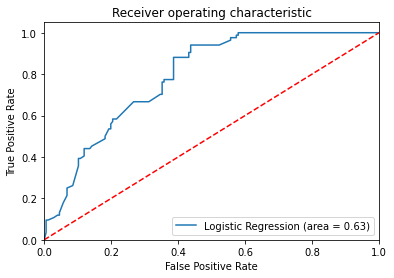

In [183]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, mdl_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mdl_lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [96]:
X=df_lr_1[['Fracs', 'DosePrescribed', 'SiteGroup_Breast', 'SiteGroup_CNS',
       'SiteGroup_Endocrine', 'SiteGroup_Eye', 'SiteGroup_GI Lower',
       'SiteGroup_GI Upper', 'SiteGroup_GU', 'SiteGroup_Gynae',
       'SiteGroup_Head & Neck', 'SiteGroup_Lung', 'SiteGroup_Lymphoma',
       'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma', 'SiteGroup_Skin']]

y=df_lr_1['ContourGroup']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.503834
         Iterations 6
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.183     
Dependent Variable:    ContourGroup      AIC:               902.6257  
Date:                  2021-01-15 11:10  BIC:               978.8109  
No. Observations:      864               Log-Likelihood:    -435.31   
Df Model:              15                LL-Null:           -532.61   
Df Residuals:          848               LLR p-value:       2.6613e-33
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Fracs                 -0.0194   0.0191  -1.0124 0.3114 -0.0569  0.0181
Dos

# For Planning

In [325]:
# one hot encode sitegroup feature
df_dum_2 = pd.get_dummies(df_clf, columns=['SiteGroup'])
df_dum_2.shape

(864, 18)

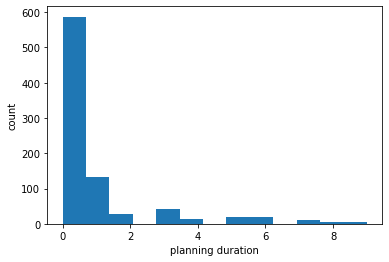

In [326]:
x=df_dum_2['PlanDur']

plt.hist(x, bins=13)  
plt.ylabel('count')
plt.xlabel('planning duration');
plt.show()

#plt.hist(x,range=(x.min(), x.max()))

In [342]:
df_dum_2.loc[df_dum_2['PlanDur'] <=0, 'PlanGroup'] = 1
df_dum_2.loc[(df_dum_2['PlanDur'] <=4)&(df_dum_2['PlanDur']>=1), 'PlanGroup'] = 2
df_dum_2.loc[df_dum_2['PlanDur'] >=5, 'PlanGroup'] = 3

In [343]:
df_dum_2['PlanGroup'].value_counts()

1.0    587
2.0    219
3.0     58
Name: PlanGroup, dtype: int64

In [344]:
df_dum_2.columns

Index(['Fracs', 'DosePrescribed', 'ContourDur', 'PlanDur', 'SiteGroup_Breast',
       'SiteGroup_CNS', 'SiteGroup_Endocrine', 'SiteGroup_Eye',
       'SiteGroup_GI Lower', 'SiteGroup_GI Upper', 'SiteGroup_GU',
       'SiteGroup_Gynae', 'SiteGroup_Head & Neck', 'SiteGroup_Lung',
       'SiteGroup_Lymphoma', 'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma',
       'SiteGroup_Skin', 'PlanGroup'],
      dtype='object')

In [345]:
df_clf_2=df_dum_2.drop(['PlanDur','ContourDur'],axis=1)

In [346]:
X=df_clf_2.drop(["PlanGroup"], axis=1).values
y=df_clf_2['PlanGroup']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
## print info
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train mean:", y_train.shape, "| y_test mean:", y_test.shape)
print(df_train.shape[1], "features:", df_train.drop("ContourGroup",axis=1).columns.to_list())

X_train shape: (604, 16) | X_test shape: (260, 16)
y_train mean: (604,) | y_test mean: (260,)
17 features: ['Fracs', 'DosePrescribed', 'SiteGroup_Breast', 'SiteGroup_CNS', 'SiteGroup_Endocrine', 'SiteGroup_Eye', 'SiteGroup_GI Lower', 'SiteGroup_GI Upper', 'SiteGroup_GU', 'SiteGroup_Gynae', 'SiteGroup_Head & Neck', 'SiteGroup_Lung', 'SiteGroup_Lymphoma', 'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma', 'SiteGroup_Skin']


# Decision tree model for planning

In [347]:
# Grid search to select best parameters
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10),
              'max_features': np.arange(3,10),
              'min_samples_split': np.arange(2,10)}
GS = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid) #class_weight={1:1/360, 2:1/130, 3:1/130}),
GS.fit(X_train, y_train)
GS.best_params_

{'max_depth': 4, 'max_features': 4, 'min_samples_split': 7}

In [348]:
y_train.value_counts()

1.0    411
2.0    154
3.0     39
Name: PlanGroup, dtype: int64

In [350]:
mdl_dt_2 = DecisionTreeClassifier(max_depth=4,
                                max_features=4,
                                min_samples_split=7)
                                #class_weight={1:1/360, 2:1/130, 3:1/130})
mdl_dt_2 = mdl_dt.fit(X_train, y_train)

In [351]:
#fn = df_train.drop("PlanGroup", axis=1).columns
#cn=['fast','medium','slow']

fig = plt.figure(figsize=(50,20), dpi=400)
_ = tree.plot_tree(mdl_dt_2, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)
#fig.savefig("decistion_tree.png")

In [352]:
mdl_dt_2.score(X_train,y_train)

0.6937086092715232

In [353]:
y_train_pred=mdl_dt_2.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[411   0   0]
 [146   8   0]
 [ 38   1   0]]
              precision    recall  f1-score   support

         1.0       0.69      1.00      0.82       411
         2.0       0.89      0.05      0.10       154
         3.0       0.00      0.00      0.00        39

    accuracy                           0.69       604
   macro avg       0.53      0.35      0.31       604
weighted avg       0.70      0.69      0.58       604



/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [354]:
# test set

#X_test = df_test.drop("ContourGroup", axis=1).values
#y_test = df_test["ContourGroup"].values
y_pred = mdl_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176   0   0]
 [ 61   4   0]
 [ 19   0   0]]
              precision    recall  f1-score   support

         1.0       0.69      1.00      0.81       176
         2.0       1.00      0.06      0.12        65
         3.0       0.00      0.00      0.00        19

    accuracy                           0.69       260
   macro avg       0.56      0.35      0.31       260
weighted avg       0.72      0.69      0.58       260



/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic regression for planning duration

In [362]:
df_dum_2.loc[df_dum_2['PlanDur'] <=1, 'PlanGroup'] = 0
df_dum_2.loc[df_dum_2['PlanDur']>1, 'PlanGroup'] = 1

In [363]:
df_lr_2 = df_dum_2.drop(['PlanDur','ContourDur'],axis=1)
df_lr_2.shape

(864, 17)

In [364]:
df_lr_2['PlanGroup'].value_counts()

0.0    720
1.0    144
Name: PlanGroup, dtype: int64

In [367]:
## split data - training and testing
X=df_lr_2.drop("PlanGroup", axis=1).values
y=df_lr_2['PlanGroup']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
## print info
print("X_train shape:", df_train.drop("ContourGroup",axis=1).shape, "| X_test shape:", df_test.drop("ContourGroup",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["ContourGroup"]),2), "| y_test mean:", round(np.mean(df_test["ContourGroup"]),2))
print(df_train.shape[1], "features:", df_train.drop("ContourGroup",axis=1).columns.to_list())

X_train shape: (604, 16) | X_test shape: (260, 16)
y_train mean: 1.39 | y_test mean: 1.45
17 features: ['Fracs', 'DosePrescribed', 'SiteGroup_Breast', 'SiteGroup_CNS', 'SiteGroup_Endocrine', 'SiteGroup_Eye', 'SiteGroup_GI Lower', 'SiteGroup_GI Upper', 'SiteGroup_GU', 'SiteGroup_Gynae', 'SiteGroup_Head & Neck', 'SiteGroup_Lung', 'SiteGroup_Lymphoma', 'SiteGroup_Paediatrics', 'SiteGroup_Sarcoma', 'SiteGroup_Skin']


In [369]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

mdl_lr_2 = LogisticRegression(max_iter=500)
mdl_lr_2.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [370]:
y_pred = mdl_lr_2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(mdl_lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [371]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[212   0]
 [ 48   0]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       212
         1.0       0.00      0.00      0.00        48

    accuracy                           0.82       260
   macro avg       0.41      0.50      0.45       260
weighted avg       0.66      0.82      0.73       260



/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


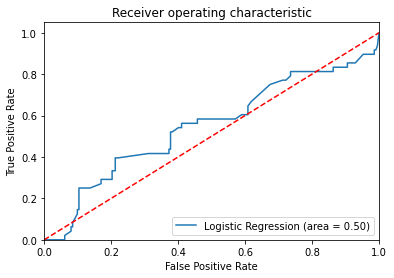

In [373]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, mdl_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mdl_lr_2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()